# Scheduling Algorithms

In [5]:
from collections import defaultdict
processNo = int(input("Enter the Number of processes:"))
processAT = []
processBT = []
process = []
TT = {}
WT = {}
process_info= {}
for i in range(processNo):
    process_name = input(f"Enter Process Name: ")
    process_info[process_name] =[]
    process_info[process_name].append((int(input(f"Enter Process-{process_name} Arrival time: "))))
    process_info[process_name].append((int(input(f"Enter Process-{process_name} Burst time: "))))
SchedulingType = int(input("Press 1. for ROUND ROBIN\nPress 2. for FCFS\n3. for SJF\n"))

Enter the Number of processes:5
Enter Process Name: P0
Enter Process-P0 Arrival time: 0
Enter Process-P0 Burst time: 4
Enter Process Name: P1
Enter Process-P1 Arrival time: 3
Enter Process-P1 Burst time: 7
Enter Process Name: P2
Enter Process-P2 Arrival time: 2
Enter Process-P2 Burst time: 1
Enter Process Name: P3
Enter Process-P3 Arrival time: 6
Enter Process-P3 Burst time: 8
Enter Process Name: P4
Enter Process-P4 Arrival time: 3
Enter Process-P4 Burst time: 5
Press 1. for ROUND ROBIN
Press 2. for FCFS
3. for SJF
1


In [6]:
from collections import defaultdict
# SchedulingType = int(input("Press 1. for ROUND ROBIN\nPress 2. for FCFS\n3. for SJF\n"))
# process_info = {'p1': [0, 5], 'p2': [1, 3], 'p3': [0, 1], 'p4': [3, 2], 'p6': [3, 4],'p5': [4,3]}
process_info = dict(sorted(process_info.items(), key=lambda item: item[1]))
print(process_info)
for item,lst in process_info.items():
    process.append(item)
    processAT.append(lst[0])
    processBT.append(lst[1])
BTcopy = processBT.copy()

{'P0': [0, 4], 'P2': [2, 1], 'P4': [3, 5], 'P1': [3, 7], 'P3': [6, 8]}


In [7]:
def rr():
    dic = defaultdict(list)
    timeSlice = int(input("Enter Time Quantum:"))
    wait = []
    Queue = []
    CurExe = 0
    ts = timeSlice
    isExe = False
    for i in range (100):
        if i in processAT:
            for num in range (processAT.count(i)):  
                if isExe == False:
                    CurExe = process[processAT.index(i) + num ]
                    print(f"Process:{CurExe} arrived at {i}")
                    dic[CurExe].append(i)
                    isExe = True
                else:
                    print(f"Process:{process[processAT.index(i) + num]} arrived at {i}")
                    Queue.append(process[processAT.index(i)+num])
                  #  dic[process[processAT.index(i)]].append(i) 
#         if i == 0 : 
#             continue
#         print(Queue)
#         ts -= 1
#         processBT[process.index(CurExe)] -= 1
   # print(processBT[process.index(CurExe)])
        if processBT[process.index(CurExe)] == 0:
            print(f"Process {CurExe} has completed at {i}")
            TT[CurExe] = (i) - processAT[process.index(CurExe)]
            WT[CurExe] = TT[CurExe] - BTcopy[process.index(CurExe)]
            dic[CurExe].append(i) 
            if not Queue:
                print("Over")
                break
            CurExe = Queue[0]
            Queue.pop(0)
            ts = timeSlice
            dic[CurExe].append(i)
        if ts == 0 and processBT[process.index(CurExe)] != 0:
            print(f"Time Slice over for {CurExe} at {i}")
            dic[CurExe].append(i)
            Queue.append(CurExe)
            CurExe = Queue[0]
            Queue.pop(0)
            dic[CurExe].append(i)
            ts = timeSlice
            
        ts -=1
        processBT[process.index(CurExe)] -= 1
    return dic

def sjf():
    def nextProcess():
        min = process_info[Queue[0]][1]
        minpr = Queue[0]
        for p in Queue:
            if process_info[p][1] < min:
                min = process_info[p][1]
                minpr = p
        return minpr
    dic = defaultdict(list)
    wait = []
    Queue = []
    CurExe = 0
    isExe = False
    for i in range (100):
        if i in processAT:
            for num in range (processAT.count(i)):  
                if isExe == False:
                    CurExe = process[processAT.index(i) + num ]
                    print(f"Process:{CurExe} arrived at {i}")
                    dic[CurExe].append(i)
                    isExe = True
                else:
                    print(f"Process:{process[processAT.index(i) + num]} arrived at {i}")
                    Queue.append(process[processAT.index(i)+num])
                  #  dic[process[processAT.index(i)]].append(i) 

   # print(Queue)
        processBT[process.index(CurExe)] -= 1
   # print(processBT[process.index(CurExe)])
        if processBT[process.index(CurExe)] == 0:
            print(f"Process {CurExe} has completed at {i}")
            TT[CurExe] = (i+1) - processAT[process.index(CurExe)]
            WT[CurExe] = TT[CurExe] - BTcopy[process.index(CurExe)]
            dic[CurExe].append(i+1) 
            if not Queue:
                print("Over")
                break
            CurExe = nextProcess()
            Queue.remove(CurExe)
            dic[CurExe].append(i+1)
    return dic

def fcfs():
    dic = defaultdict(list)
    wait = []
    Queue = []
    CurExe = 0
    isExe = False
    for i in range (100):
        if i in processAT:
            for num in range (processAT.count(i)):  
                if isExe == False:
                    CurExe = process[processAT.index(i) + num ]
                    print(f"Process:{CurExe} arrived at {i}")
                    dic[CurExe].append(i)
                    isExe = True
                else:
                    print(f"Process:{process[processAT.index(i) + num]} arrived at {i}")
                    Queue.append(process[processAT.index(i)+num])
                  #  dic[process[processAT.index(i)]].append(i) 
#         if i == 0 : 
#             continue
#         print(Queue)
        processBT[process.index(CurExe)] -= 1
   # print(processBT[process.index(CurExe)])
        if processBT[process.index(CurExe)] == 0:
            print(f"Process {CurExe} has completed at {i+1}")
            TT[CurExe] = (i+1) - processAT[process.index(CurExe)]
            WT[CurExe] = TT[CurExe] - BTcopy[process.index(CurExe)]
            dic[CurExe].append(i+1) 
            if not Queue:
                print("Over")
                break
            CurExe = Queue[0]
            Queue.pop(0)
            dic[CurExe].append(i+1)
    return dic

if SchedulingType == 1 :
    dic = rr()
elif SchedulingType == 2 :
    dic = fcfs()
    print(dic)
    
elif SchedulingType == 3 :
    dic = sjf()
else:
    print("Please give a valid input")
print(TT)
print(WT)


Enter Time Quantum:3
Process:P0 arrived at 0
Process:P2 arrived at 2
Process:P4 arrived at 3
Process:P1 arrived at 3
Time Slice over for P0 at 3
Process P2 has completed at 4
Process:P3 arrived at 6
Time Slice over for P4 at 7
Time Slice over for P1 at 10
Process P0 has completed at 11
Time Slice over for P3 at 14
Process P4 has completed at 16
Time Slice over for P1 at 19
Time Slice over for P3 at 22
Process P1 has completed at 23
Process P3 has completed at 25
Over
{'P2': 2, 'P0': 11, 'P4': 13, 'P1': 20, 'P3': 19}
{'P2': 1, 'P0': 7, 'P4': 8, 'P1': 13, 'P3': 11}


[10 20 30 40 50]


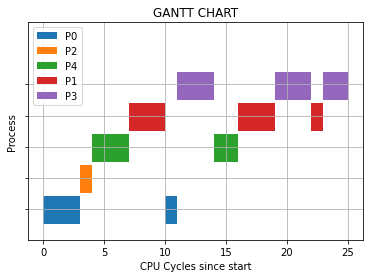

<Figure size 432x288 with 0 Axes>

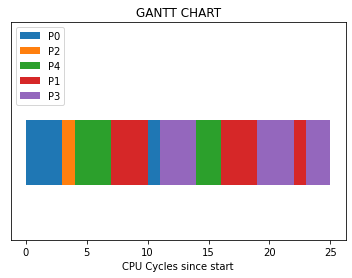

In [8]:
# Importing the matplotlib.pyplot

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# Declaring a figure "gnt"
fig, gnt = plt.subplots()
# Setting Y-axis limits
gnt.set_ylim(0, 70)

# Setting labels for x-axis and y-axis
gnt.set_xlabel('CPU Cycles since start')
gnt.set_ylabel('Process')
ytics = np.arange(10,(len(process) + 1)*10,10)
print(ytics)
# Setting ticks on y-axis
gnt.set_yticks(ytics)
# Labelling tickes of y-axis
gnt.set_yticklabels([])
yOffset = 5
plt.title("GANTT CHART")
# Setting graph attribute
gnt.grid(True)
color = ['blue','orange','green','red','purple','brown','pink','gray','olive','cyan']
ColorInd = 0
for num,lst in dic.items():
    lstS = []
    lstD = []
    for i in range(len(lst)):
        if i%2 == 0:
            lstS.append(lst[i])
        else:
            lstD.append(lst[i] - lst[i-1])
#     print(lstS)
#     print(lstD)
    barh = list(zip(lstS,lstD))
    gnt.broken_barh(barh, (yOffset, 9), facecolors =(f'tab:{color[ColorInd]}'),label = num)
    gnt.legend(loc="upper left")
    ColorInd +=1
    yOffset = yOffset+10
plt.show()
plt.savefig("gchart.png") 
ColorInd = 0
fig,gnt2 = plt.subplots()
gnt2.set_ylim(0,20)
gnt2.set_xlabel('CPU Cycles since start')
gnt2.get_yaxis().set_visible(False)
plt.title("GANTT CHART")
for num,lst in dic.items():
    lstS = []
    lstD = []
    for i in range(len(lst)):
        if i%2 == 0:
            lstS.append(lst[i])
        else:
            lstD.append(lst[i] - lst[i-1])
#     print(lstS)
#     print(lstD)
    barh = list(zip(lstS,lstD))
    gnt2.broken_barh(barh, (5,6), facecolors =(f'tab:{color[ColorInd]}'),label = num)
    gnt2.legend(loc="upper left")
    ColorInd +=1

In [14]:
pip install -U prettytable

Note: you may need to restart the kernel to use updated packages.


In [9]:
TTsorted = []
WTsorted = []
# print(process)
for pro in process:
#     print(pro)
    TTsorted.append(TT[pro])
    WTsorted.append(WT[pro])
from prettytable import PrettyTable
x = PrettyTable()
field_names = ["Job", "Arrival Time", "Burst time", "TurnAround Time", "Waiting Time"]
x.add_column(field_names[0],process)
x.add_column(field_names[1],processAT)
x.add_column(field_names[2],BTcopy)
x.add_column(field_names[3],TTsorted)
x.add_column(field_names[4],WTsorted)
print(x)
print(f"Average Turnaround time:{sum(TTsorted) / len(TTsorted)}")
print(f"Average Waiting time:{sum(WTsorted) / len(WTsorted)}")

+-----+--------------+------------+-----------------+--------------+
| Job | Arrival Time | Burst time | TurnAround Time | Waiting Time |
+-----+--------------+------------+-----------------+--------------+
|  P0 |      0       |     4      |        11       |      7       |
|  P2 |      2       |     1      |        2        |      1       |
|  P4 |      3       |     5      |        13       |      8       |
|  P1 |      3       |     7      |        20       |      13      |
|  P3 |      6       |     8      |        19       |      11      |
+-----+--------------+------------+-----------------+--------------+
Average Turnaround time:13.0
Average Waiting time:8.0
